In [1]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt

### Diffusion equation
\begin{eqnarray}
\frac{\partial \rho(x,t)}{\partial t}
&=&
D
\frac{\partial^2 \rho(x,t)}{\partial x^2} \, ,
\label{eq:DiffEq}
\end{eqnarray}

#### Solution 
Gaussian function
\begin{eqnarray}
\rho(x,t) = \frac{1}{\sqrt{2\pi \sigma^2(t)}} \exp\left( - \frac{(x-\mu)^2}{2  \sigma^2(t)}\right) \, ,
\label{eq:solution1}
\end{eqnarray}

with mean

\begin{eqnarray}
\mu = x_0 \, ,
\end{eqnarray}

and time-dependent standard deviation

$$
\sigma(t) = \sqrt{2 D t} \, .
$$

## Plot Gaussian function for different times

In [37]:
def g(x, t, x0, D):
    sigmat = np.sqrt(2 * D * t)
    mu     = x0
    return np.sqrt( 1 / ( 2 * np.pi * sigmat ** 2) )* np.exp( - (x - mu)**2 / ( 2 * sigmat ** 2) )

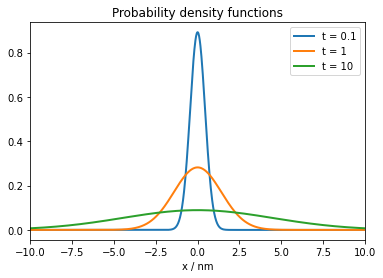

In [38]:
# Array of x values
N        = 1000
xmin     = -10
xmax     = - xmin
xcenters = np.linspace(xmin, xmax, N)

# Time
t1     = 0.1 # ps
t2     = 1 # ps
t3     = 10 # ps

# Diffusion
D      = 1 # nm2 ps-1

# Initial position
x0     = 0

# Calculate probability density function
rho1   = g(xcenters, t1, x0, D)
rho2   = g(xcenters, t2, x0, D)
rho3   = g(xcenters, t3, x0, D)


# Figure
plt.plot(xcenters, rho1, linewidth = 2, label = 't = ' + str(t1))
plt.plot(xcenters, rho2, linewidth = 2, label = 't = ' + str(t2))
plt.plot(xcenters, rho3, linewidth = 2, label = 't = ' + str(t3))
plt.xlabel('x / nm')
plt.xlim((xmin, xmax))
plt.title('Probability density functions')
plt.legend();

### Simulation of Brownian motion

The standard deviation $\sigma(t) = \sqrt{2D t}$ denotes the average displacement that a particle experiences in time $t$.

If we divide the time in short intervals $dt$, then we can derive an integration scheme for Brownian particles:

$$
x_{k+1} = x_k + \sqrt{2D dt} \cdot \eta_k \, ,
$$

where $\eta_k$ is a random number drawn from a normal distribution.

#### Simulation of 1 trajectory

(-2.0, 2.0)

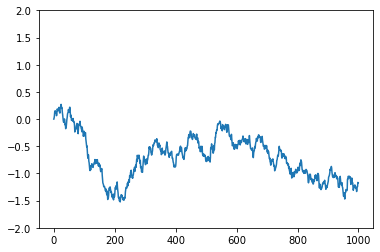

In [4]:
# Number of timesteps per each trajectory
Nsteps = 1000

# Timestep
dt     = 0.001

# Array where to save the trajectory
x      = np.zeros(Nsteps)


# Diffusion
D      = 1 # nm2 ps-1

# Initial position
x0     = 0


# Assign initial condition
x[0]   = x0 

for k in range(Nsteps-1):
    
    # Random number
    eta = np.random.normal(0, 1, 1)
    
    # Update position
    x[k+1] = x[k] + np.sqrt(2 * D * dt) * eta
    
# Plot the trajectory
plt.plot(x)
plt.ylim(-2,2)

#### Simulation of $N$ trajectory
In the following exercise:
1. Generate a set of $N$ trajectories
2. Calculate the mean and the standard deviation of the trajectories
3. Build the histogram of the trajectories and compare the solution with the Gaussian function

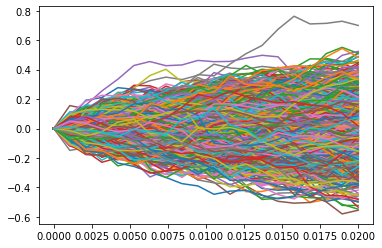

In [27]:
# Number of simulations
N      = 1000

# Number of timesteps per each trajectory
Nsteps = 20

# Timestep
dt     = 0.001

# Array where to store the trajectories (this is a matrix)
X      = np.zeros((Nsteps, N))

# Diffusion
D      = 1 # nm2 ps-1

# Initial position
x0     = 0


# Assign initial condition to each trajectory
X[0,:] = x0

# Double for loop
for n in range(N):
    for k in range(Nsteps-1):
        eta      = np.random.normal(0, 1, 1)
        X[k+1,n] = X[k,n] + np.sqrt(2 * D * dt) * eta
    
    
# Plot all trajectories
t = np.linspace(0, Nsteps * dt, Nsteps)
plt.plot(t, X);

### Alternative solution by parallelization
In the previous solution, We simulated one trajectory at a time by means of a double for-loop.

However, for-loops are generally computer-intensive tasks.

Sometimes, it is possible to parallelize the for-loops in order to speed up the calculations.

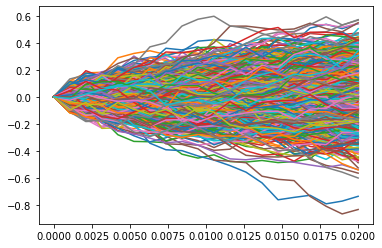

In [28]:
# Number of simulations
N      = 1000

# Number of timesteps per each trajectory
Nsteps = 20

# Timestep
dt     = 0.001

# Array where to store the trajectories (this is a matrix)
X      = np.zeros((Nsteps, N))

# Diffusion
D      = 1 # nm2 ps-1

# Initial position
x0     = 0


# Assign initial condition to each trajectory
X[0,:] = x0

# Parallelization
for k in range(Nsteps-1):
    eta      = np.random.normal(0, 1, N)
    X[k+1,:] = X[k,:] + np.sqrt(2 * D * dt) * eta
    
# Plot all trajectories
t = np.linspace(0, Nsteps * dt, Nsteps)
plt.plot(t, X);

(-0.1, 0.1)

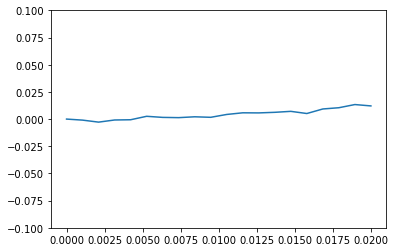

In [29]:
# Calculate mean
m = np.mean(X, axis = 1)
plt.plot(t, m)
plt.ylim(-0.1, 0.1)

(-0.1, 0.2)

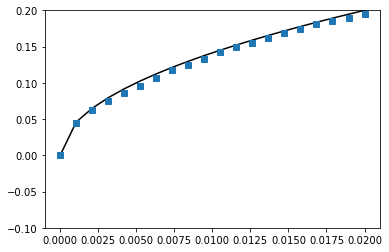

In [31]:
# Analytical solution
def brownian_std(t):
    return np.sqrt( 2 * D * t )

# Calculate standard deviation
s = np.std(X, axis = 1)
plt.plot(t, brownian_std(t), 'k')
plt.plot(t, s, 's')

plt.ylim(-0.1, 0.2)

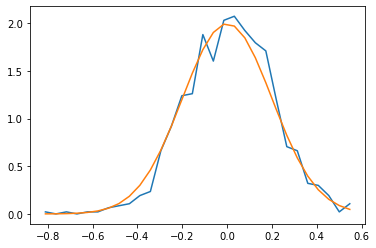

In [39]:
# Build the histogram

# Define number of bins
Nbins = 30

# Calculate the histogram
h, x_edges  = np.histogram(X[-1,:], Nbins)

# Calculate the size of one bin interval
dx          =  x_edges[1] - x_edges[0]

# Shift the array x_edges by 0.5 * dx
x_centers   = x_edges + 0.5 * dx

# Remove the last entry of x_centers
x_centers   = x_centers[:-1]

# Normalization
p           = h / np.sum(h * dx)

# Plot the histogram
plt.plot(x_centers, p)
plt.plot(x_centers, g(x_centers, Nsteps * dt, x0, D))